# Eaters World

The next part of the tutorial involves creating rules for *eaters*.

An eater is kind of like Pacman. It tries to gobble up as much food as it can.

**World**
* The eaters world is a 16 by 16 grid where each cell holds either a `eater`, `wall`, `bonusfood`, or `normalfood`.

**Food**
* `normalfood` (green) is worth 5 points
* `bonusfood` (gold) is worth 10 points.

**Eaters**
* Eaters can move `north`, `south`, `east`, or `west`. 
* They know their `X` `Y` coordinates on the grid.
* They can sense the contents in the four squares around them.
    You'll use this information to program different strategies for the eater to find food to eat.

**Lessons**
* Inputs & outputs
* Preferences
* Theory (the kernel, design principles)
* Syntactic sugar
* We'll continue our dicussion on disjunctions
* Utility states

**Scroll down to the "Start here" cell.**

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../src/')

from lib.pysoarlib import *
import os
from _3_eaters import *
from _3_eaters_intro_rules import *

# Start Here

Run the cell below a few times to see a simple eater in action.

All this eater does is sense the four squares around it. 
If one of the squares contains food, it moves towards it.
Notice how these simple rules will cause an eater to get stuck if it cannot sense any food.

This will run for 50 ticks at .25 seconds a tick (12 seconds) if you don't do anything. Press the stop button to halt the program once the eaters have settled.

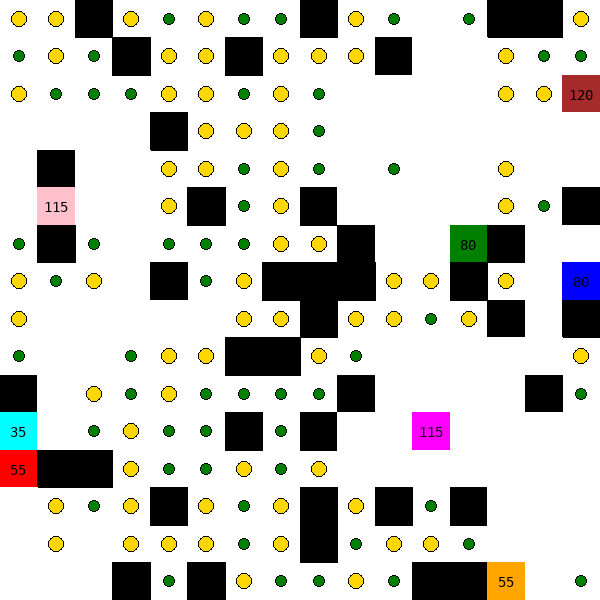

--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.
--------- SOURCING PRODUCTIONS ------------
Total: 3 productions sourced.


KeyboardInterrupt: 

In [6]:
eaters = [
    ('blue', simple_move_to_food_agent),
    ('red', simple_move_to_food_agent),
    ('green', simple_move_to_food_agent),
    ('orange', simple_move_to_food_agent),
    ('pink', simple_move_to_food_agent),
    ('cyan', simple_move_to_food_agent),
    ('magenta', simple_move_to_food_agent),
    ('brown', simple_move_to_food_agent),
]

runner(eaters, total_ticks=50, tick_speed=.25)

## Let's write it ourselves!

So far, our agents haven't interacted with the outside world at all. They have only maintained an internal state that we populated manually. 
Using what we know now, we couldn't create a robot that moved through an office building to give a stapler to an employee.
That would require *sensing* walls around it, *moving* using some path finder algorithm, and some *hand-stapler* mechanism that guided the robot arm to place a stapler on a desk.
In Soar, you'd program the logic `if I have a stapler, and <target> is infront of me, hand them the stapler, else move to target` into the agent. 
You *wouldn't* program the actual *moving* or *sensing* however. This is because Soar is a kernel.

#### The kernel

Soar clarifies that it is *not* an all purposed AI machine. Soar is a "kernel". The linux kernel, for example, isn't a full-fledged operating system. It doesn't have a GUI. It doesn't have a text editor you can use to edit files using a mouse and keyboard. It does, however, provide hooks for someone to build these things ontop of it. It manages low level process scheduling, memory management, and security. 

You can think of Soar in a similar fashion. Soar won't give you a nice library for recognizing objects from a camera feed or for moving a robot from one location to another with A*. It does, however, give you hooks to send information to the agent (I sense a wall infront of me) for internal planning and reasoning. 
If rules were to fire for `wall infront` and `wall infront of me is bad` then you can have another hook to listen to that event and modify your agents real world position using the robot's motor system.

#### IO

Sending information to a Soar agent is done through an `input-link`. Receiving commands from a Soar agent is done through an `output-link`.

In this section, we'll talk about the two phases of the Soar cycle we left out in the last lesson: input and output phase.

TODO picture of the soar cycle
![Soar cycle](img/soar-cycle-5-steps.png)


#### Jargon you may come across

`Sensors / perception mechanism` Anything that gives an agent information about the outside world. For example, in the eaters world, we provide the agent with the perception of the food around it. If this was a robotics problem in the real world, our sensor could be a camera. We could perform object recognition from the camera feed then send that information (object name, position, etc) to the Soar agent.

`Actuators` How agents perform actions to modify the world around them.

### Output Link

Let's begin by writing an agent that just moves in one direction. 

We can accomplish this task with two rules: `propose*move-north`, `apply*move-north`.

```
propose*move-north
If I exist, 
then propose the move-north operator.

apply*move-north
If the move-north operator is selected, 
then generate an output command to move north.
```

Soar agents have an object in WM called `io`. 
This `io` object has two children, `input-link` and `output-link`.
We can add to the `output-link` as a way of creating commands.
In this case, our command is `move`. 
Our `move` can store information itself, like the speed at which we want to move, or direction.

In `apply*move-north`, we want to create this `move` object on the `output-link` with the `direction` as `north`.

![Output link](./img/3_output-link-north.png)

#### Exercise

Try writing the above two rules to propose and apply the `move-north` operator.

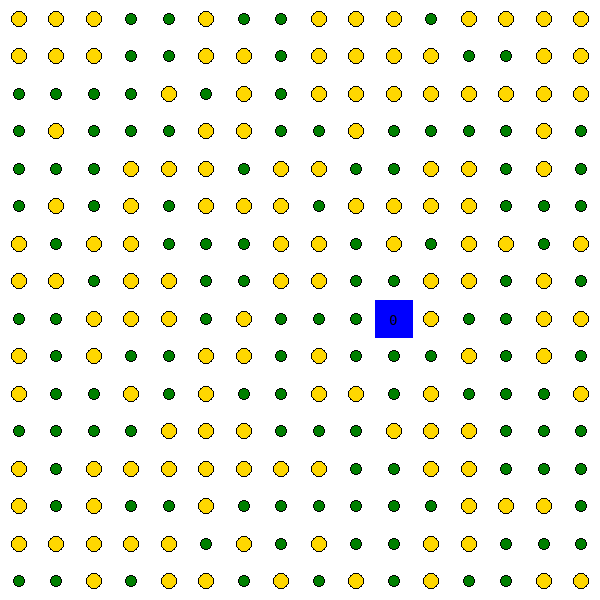

--------- SOURCING PRODUCTIONS ------------
Expected ( to begin condition element
(Ignoring production propose*move-north)
Production addition failed.
	/tmp/agent_blue.soar:2Total: 0 productions sourced.
--- Input Phase ---
=>WM: (25: W1 ^content normalfood)
=>WM: (24: L2 ^west W1)
=>WM: (23: E3 ^content bonusfood)
=>WM: (22: L2 ^east E3)
=>WM: (21: I4 ^content normalfood)
=>WM: (20: L2 ^south I4)
=>WM: (19: N1 ^content normalfood)
=>WM: (18: L2 ^north N1)
=>WM: (17: I2 ^location L2)
=>WM: (16: E2 ^y 10)
=>WM: (15: E2 ^x 8)
=>WM: (14: I2 ^eater E2)

--- END Input Phase ---
--- Proposal Phase ---

--- END Proposal Phase ---
--- Decision Phase ---
=>WM: (39: S2 ^quiescence t)
=>WM: (38: S2 ^choices none)
=>WM: (37: S2 ^impasse no-change)
=>WM: (36: S2 ^attribute state)
=>WM: (35: L3 ^result R6)
=>WM: (34: L3 ^command C4)
=>WM: (33: S2 ^smem L3)
=>WM: (32: E4 ^present-id 1)
=>WM: (31: E4 ^result R5)
=>WM: (30: E4 ^command C3)
=>WM: (29: S2 ^epmem E4)
=>WM: (28: S2 ^reward-link R4)
=>WM: (

KeyboardInterrupt: 

In [7]:
my_move_north_operators = """
sp {propose*move-north 
    # Code here
}

sp {apply*move-north
    # Code here
}
"""

eaters = [('blue', my_move_north_operators)]
# If you have trouble and want to debug, set the soar_watch_level to a number like 3 or 5
# Debug=True will print each world tick and observations for each eater
runner(eaters, soar_watch_level=5, debug=False, total_ticks=4, world_type='all food')

#### Quick tips on debugging

This is my process for debugging this eater Soar agent:

**1. Turn on Debug mode**

    Debug mode will show you the start and end of each world tick, along with the eater's observations and final actions.


**2. Limit yourself to 1 agent**

    It's easier to see everything going on with just one agent's logs.

**3. Print out the Soar code**

    For me, it helps to do a `print(my_move_north_operators)` and review the code all together. This tip won't help in the above scenario, but later I'll give you boilerplate - it may help to print out all of your code then.

**4. Turn the watch level up to 5**

    `5` is the max *watch level* for a Soar agent. This will print out all agent info.


**5. Read the logs carefully**

    Note down what you expect to happen and what is really happenning. 
    
If something doesn't match expectations:
1. Check syntax
2. Check variable, identifier, value, etc names
3. Write a "monitor" rule

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

In [ ]:
answer_move_north_operators = """
sp {propose*move-north 
    (state <s> ^type state)
-->
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}

sp {apply*move-north
    (state <s> ^operator <o>
               ^io <io>) 
    (<io> ^output-link <out>)
    (<o> ^name move-north) 
-->
    (<out> ^move <move>) 
    (<move> ^direction north)}
"""

answer_move_north_operators_condense_notation = """
sp {propose*move-north 
    (state <s> ^type state)
-->
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}

sp {apply*move-north
    (state <s> ^operator.name move-north
               ^io.output-link <out>) 
-->
    (<out> ^move.direction north)}
"""

eaters = [('blue', answer_move_north_operators_condense_notation)]
runner(eaters, total_ticks=3, tick_speed=.1, world_type='all food')

Our eater moves... once.

Let's review the rules.

**Propose**
```
sp {propose*move-north 
    (state <s> ^type state)
-->
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}
```
Nothing special here: on state, propose a new operator named `move-north`.

**Apply**
```
sp {apply*move-north
    (state <s> ^operator <o>
               ^io <io>)        # ^io must be matched to get to the output-link
    (<io> ^output-link <out>)   # ^output-link gives path to identifier for action
    (<o> ^name move-north) 
-->
    (<out> ^move <move>)        # Add command to output-link to move north
    (<move> ^direction north)}
```
(See the above *condensed* version for a more succinct way to write the same thing.)

We've seen the whole `match a state to an operator named "my-operator"` before. 
Above, the new addition is matching on a state with an `io` object (and subsequently throwing that into the `<io>` variable).
We then see if our matched `<io>` has the attribute `^output-link`.

In the "then" portion, we add an object to the `<out>` output-link. 
This object is a command named `move` that carries additional information about the direction in which the agent wants to move.

If you go into the `Eater` class provided to you, you'll see that we are initializing an agent connector. The connector handles the logic for listening to commands named `move`.

```
self.move_command = "move"
self.add_output_command(self.move_command)
```

Once that has been added, whenever the agent adds `move` to the `output-link`, the following function will be called.

```
def on_output_event(self, command_name, root_id):
    if command_name == self.move_command:
        direction = root_id.GetChildString("direction")
        self.last_move_output = direction
        root_id.AddStatusComplete()
```

In our Soar rule, when we add `move` to the `output-link`, we also add `direction` to `move`. 
The line `direction = root_id.GetChildString("direction")` saves the value of the `direction` object into a variable.

Finally, we save the move output for later. In `runner` there is simple loop that takes the output and applies it to the world. Here is the loop in full:

**1. Get observations**

Get the items to the north, south, east, and west of the eater.

**2. Update eater**

Add these observations to the `input-link` of the eater. 
The eater will update its internal state given the new observations.

**3. Take action**

If the eater has created a `move` an `output-link`, take the move direction and apply it to the world.
If the move is valid, the world will update.

In [ ]:
# TODO it may be nice to show how to add an input link and listen to output commands using the 
# .execute_command function

## Move-North: Making Multiple Moves

So why did the eater only take one step north? Why didn't it continue?

To the Soar agent, nothing provoked the need to move again. We propose to move for the sole condition `(state <s> ^type state)`. 
Once we move again, nothing has changed to the Soar agent. 
*We* see that it's moved, but *it* doesn't know that it has. 
What we want to do instead is give the Soar agent fresh information once it moves so it knows whether or not to move again.

#### Design Principle: One to One Firings

In Soar, it is recommended to design your agents to select operators (like move) **once** per **operator instance**.

We added a move operator instance in our `propose*move-north` rule...
```
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}
```
...that created one operator instance.

What we want is to **design the eater so that a new instance of the move-north operator is created for each move**.

TODO Unsure the best way to explain *why* for this ^^

What we can do for now is give Soar it's X Y coordinates on the grid.
Then, whenever those coordinates change, we can make the eater move again.
In our simple example, the agent will move until it hits the boundaries of the world.
It then won't keep going because its state of the world (X Y coordinates) won't change.

Looks look at the rule.
```
sp {propose*move-north
    (state <s> ^io.input-link.eater <e>) 
    (<e> ^x <x> ^y <y>)
-->
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}
```

In the first condition, we're checking to see if the state has an `input-link` with `eater` on it. The second condition checks if there is an `x` and `y`.

In [ ]:
move_north_operators_with_x_y = """
sp {propose*move-north
    (state <s> ^io.input-link.eater <e>) 
    (<e> ^x <x> ^y <y>)
-->
    (<s> ^operator <o> +) 
    (<o> ^name move-north)}

# This is the same as before
sp {apply*move-north
    (state <s> ^operator <o>
               ^io <io>) 
    (<io> ^output-link <out>)
    (<o> ^name move-north) 
-->
    (<out> ^move <move>) 
    (<move> ^direction north)}
"""

eaters = [('blue', move_north_operators_with_x_y)]
runner(eaters, total_ticks=20, tick_speed=.25, world_type='all food')

Remember our discussion about `instantiation supported`/`operator supported` memory? 

#### Refresher

Memory who's lifetime is dependent on the rule that created it is called `i-support`. When the contents for water jug changes, the old rule matching the old contents **retracts**. Soar then fires a *new* rule for the *new* contents which in turn creates a *new* `empty` working memory element.

Memory that persists long after it's parent rule has retracted is `o-support` memory. 
If a rule with an operator matches (`(state <s> ^operator.name initialize-water-jug)`) and if that rule then modifies state (`(<s> ^name water-jug ^jug <j1> ^jug <j2>)`) it will be persistent. This is because in Soar, *persistent working memory can only be created through operator rules*.

#### Okay, so what happened?

Our new `move-north` rule is *dependent solely on the state and the X Y coordinates*, therefore it is in the `i-support` camp.
When X or Y changes, the current `move-north` rule doesn't *exactly match* the new state. The current rule *retracts* and a new rule fires.

#### Debugger

Let's look at what the debugger shows us.

In [ ]:
eaters = [('blue', move_north_operators_with_x_y)]
runner(eaters, total_ticks=5, debug=True, world_type='all food', soar_watch_level=5, display_world=False)

`<=` Removal from WM

`=>` Addition to WM

`=> (NUMBER: I3 ^move M2)`

number indicates the *timetag* of the working memory element.


TODO this is a bit dependent on getting the update_wm correct in the runner, debugger doesn't match exactly the Soar tutorial

Now, we're only going to look at what is happening on `output-link` (`debug_output_link=True`).

In [ ]:
eaters = [('blue', move_north_operators_with_x_y)]
runner(eaters, total_ticks=3, tick_speed=.1, world_type='all food', display_world=False, debug_output_link=True)

After 3 ticks, our `output-link` has accumulated a bunch of move commands. 
These commands will continue to pile on the `output-link` unless we manually specify their removal.

Let's look at our rule that created these `move` commands in WM.
After looking at the rule, don't read further until you answered the question: is this rule in the `o-support` or `i-support` camp?

```
sp {apply*move-north
    (state <s> ^operator.name move-north
               ^io.output-link <out>) 
-->
    (<out> ^move.direction north)}
```

Blank space to hiding answer.

Blank space to hiding answer.

Blank space to hiding answer.

Blank space to hiding answer.

Blank space to hiding answer.

IwishInewAwaytoHideAnswersInNoteBooksbutThisisAnOSupportRule because it tested a selected operator and modified the state.

So how do we remove the old commands? 
Because we are going to persitently make an update to state,
we have to ensure we do the removal during an operator application rule. 

Notice how the `^status complete` to the completed move commands. 
If you look at the code for the eater's AgentConnector, you'll find that we manually mark the output command's status to be complete.

```
def process_move_command(self, root_id):
    # Can ignore this part for now
    direction = root_id.GetChildString("direction")
    self.last_move_output = direction
    
    root_id.AddStatusComplete() # <<<<<<<<
```

This is where you would write/call any actuator code (move the robot arm to place a stapler on a desk).

We can write a rule to remove completed moves from WM in an operator application rule.

In [ ]:
remove_completed_move = """
sp {apply*move-north*remove-move
    (state <s> ^operator.name move-north
               ^io.output-link <out>) 
    (<out> ^move <move>)
    (<move> ^status complete) 
-->
    (<out> ^move <move> -)}
"""

eaters = [('blue', move_north_operators_with_x_y + remove_completed_move)]
runner(eaters, total_ticks=3, tick_speed=.1, world_type='all food', display_world=False, debug_output_link=True)

In the "then" part of the rule, we remove the matched `output-link` that has a completed `<move>` from WM using the `-` sign (aka the **reject preference**). 
And because `^status complete` and `^direction` were both children of the move command object, they get removed too.

Since this was an operator application rule, it is fired during the "Operator Application" phase.

![soar cycle](img/3_soar-cycle-with-support-labels.png)

Remember that Soar fires rules in parallel, so the `apply*move-north` and `apply*move-north*remove-move` will happen at the same time (remove old move command, add new move command).

TODO Good quote to add somewhere (p64)
> From prior runs, you know that I3 is the identifier of the output-link. Although Soar does not guarantee that I3 will always be the identifier of the output-link, it always is, just as I1 is the identifier of the io object, I2 is the identifier of the input-link, and S1 is the identifier of the first state.

## Move-To-Food Operator 

You should now have the knowledge to write the rules for the first agent we saw: the move-to-food agent.

Instead of testing the `input-link` for an eater (`(state <s> ^io.input-link.eater <e>)`), you'll want to test the `input-link` for the food around the agent (`(state <s> ^io.input-link.location.north/south/east/west.content`).
The `content` will either be `normalfood` or `bonusfood`.

#### Exercise

Write the following rules:
1. (propose) If normalfood is by me, propose I move-to-food in that direction.
2. (propose) If bonusfood is by me, propose I move-to-food in that direction.
3. (apply) If the move-to-food operator is selected, create an output command to move in that direction.
4. (apply) If the move-to-food operator is selected and there's an existing completed move command, remove it.

Things to keep in mind:
* To keep things simple, have `1` and `2` *indifferently* propose the operator so that the agent chooses where to move *at random*. Remember that if you don't specifiy this indifference, an impasse will be thrown.


Extra credit:
1. Combine `1` and `2` into a single rule using disjunctions as disucssed in the previous tutorial.
2. Write a monitor rule that prints out the contents of the cells around the agent.

In [ ]:
exercise_move_to_food_agent = """

"""

eaters = [
    ('blue', exercise_move_to_food_agent),
#     ('red', exercise_move_to_food_agent), add more eaters if you want
]

runner(eaters, debug=True, soar_watch_level=5)

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

### This space is intentionally left blank to hide the answers

---


### This space is intentionally left blank to hide the answers

---

In [ ]:
exercise_move_to_food_applications = """
sp {apply*move-to-food
    (state <s> ^io.output-link <out>
               ^operator <o>) 
    (<o> ^name move-to-food
         ^direction <dir>)
-->
    (<out> ^move.direction <dir>)}    

sp {apply*move-to-food*remove-move 
    (state <s> ^io.output-link <out>
               ^operator.name move-to-food) 
    (<out> ^move <move>)
    (<move> ^status complete) 
-->
    (<out> ^move <move> -)}
"""

exercise_move_to_food_agent_answer = exercise_move_to_food_applications + """
sp {propose*move-to-normalfood
    (state <s> ^io <io>)
    (<io> ^input-link <input-link>) 
    (<input-link> ^location <my-loc>) 
    (<my-loc> ^<direction> <cell>) 
    (<cell> ^content normalfood)
-->
    (<s> ^operator <o> +) 
    (<s> ^operator <o> =) 
    (<o> ^name move-to-food
         ^direction <direction>)}

# Notice how this is a lot like the above rule, just condensed 
sp {propose*move-to-bonusfood
    (state <s> ^io.input-link.location.<dir>.content bonusfood)
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move-to-food
         ^direction <dir>)}
         
"""

exercise_move_to_food_disjunction = exercise_move_to_food_applications + """
sp {propose*move-to-food
    (state <s> ^io.input-link.location.<dir>.content 
                            << normalfood bonusfood >>)
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move-to-food
         ^direction <dir>)}
"""

exercise_move_to_food_agent_monitor_answer = exercise_move_to_food_agent_answer + """
sp {eater*monitor*directions
    (state <s> ^io.input-link.location.<dir>.content <item>)
-->
    (write (crlf) <dir> | <<<<has item>>>> | <item>)}
"""

eaters = [
#     ('blue',   exercise_move_to_food_agent_monitor_answer),
    ('red',    exercise_move_to_food_disjunction),
    ('purple', exercise_move_to_food_agent_answer),
    ('orange', exercise_move_to_food_agent_answer),
    ('yellow', exercise_move_to_food_agent_answer), 
]

runner(eaters, total_ticks=100, tick_speed=.1)

### Syntactic Sugar

Here are a couple of tips for shortening your Soar code:

`<< >>` **Disjunctions**. In the last lesson we talked about using an "or" to test if one or more values match a condition (Filtering for brown *or* gray cars `<car> ^color << brown gray >>`).

We can apply that idea to get normalfood *or* bonusfood.
```
(state <s> ^io.input-link.location.<dir>.content 
                        << normalfood bonusfood >>)
```

Another shortcut we can do is matching values on different children of an object.
Example: match on `operator` with `^name` `move-to-food` *and* `^direction` `south`.
To do this, we use parenthesis.
```
(state <s> ^io.output-link <out>
           ^operator (^name move-to-food 
                      ^direction <dir>))
```

Write the rules in the manner that is most readable to you. 
Sometimes, including syntactic sugar leads to less readability.

## Debugging Soar Programs

I'm going to go over this section in less depth than other parts of the tutorial.
I encourage you to read the full chapter in the Soar tutorial (page 71-77).

#### Syntax Errors

Soar syntax is unlike any syntax that I work with on a regular basis.
The Soar authors have found these to be the eight most common errors.
1. Missing comment character
2. Missing {
3. Missing )
4. Extra )
5. Missing }
6. Missing state
7. Missing ^
8. Disconnected rhs action variable.

I recommend downloading the Soar extension in VSCode. 
If I think I'm running into a syntax error, I just copy and paste my Soar file there and check the highlighting.
As I'm writing this, there doesn't seem to be error highlighting, but you'll know something is wrong if the colors don't appear right:

![when there's an error](img/3_syntax-highlighting-when-error.png)

Correcting it I get:

![colored](./img/3_syntax-highlighting-colored.png)

However, this system is not perfect. 
Below you'll see that no color helped indicate that there was an error with a missing space in the `<< >>` (third line).

![example of no color cues](./img/3_syntax-highlighting-or.png)

The Soar tutorial recommends using their VisualSoar Java program.

#### Write Statements

Here they recommend to never overlook the good-ol-fashion print statement for debugging (using the write command).
Follow previous advice on creating `monitor` rules.

#### Runtime Debugging Commands

Useful debugging commands to keep in mind:

`print` Log working memory structures.

`wmes` Log *individual* working memory elements.

```
> wmes o1
(120: o1 ^name move-to-food) 
(121: o1 ^direction east)
```

Notice the timetags (120, 121) are included too.

`matches` Answers the question, "what rules are about to fire?"

`preferences` Shows the preferences for selecting an operator. 
Example:
```
> preferences s1 operator 
Preferences for S1 ^operator: 
acceptables:
    O7 (move-to-food) + 
    O8 (move-to-food) + 
    O9 (move-to-food) +
unary indifferents: 
    O7 (move-to-food) = 
    O8 (move-to-food) = 
    O9 (move-to-food) =
```

We can see that three operators are propose, and each has an acceptable and indifferent preference.

If you wanted to add one of these to this eaters program, go to the `runner` function and modify the code in the while-loop's eater for-loop.

`eater.agent.execute_command('wmes o1', print_res=True)`

Refer to the Soar Manual for full argument list.

#### Semantic Errors

TODO

## Generalized Move Operator

The move-to-food operator we just wrote was greedy: eat whatever food is closest. 
This has the fault of eventually trapping an eater when it can't sense any food around it.
It also didn't differentiate between bonus and normal food.

Let's fix the lowest hanging fruit first and make the eater move to any type of cell that's not a wall.

We could either write a rule to move into \<\<a blank cell OR a cell with food OR a cell with another eater>> or we could just prevent the eater from moving into wall cells.
    
Implementing the first would look like so:
```
sp {propose*move*option-1
    (state <s> ^io.input-link.my-location.<dir>.content
        << empty normalfood bonusfood eater >>)
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move
         ^direction <dir>)}
```

But lets say we wanted to throw the value of `content` into a variable:
```
sp {propose*move*option-1a
    (state <s> ^io.input-link.my-location.<dir>.content
        { <content> << empty normalfood bonusfood eater >> })
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move
        ^direction <dir> 
        ^content <content>)}
```

By using the curly braces, we could match on a value *and* assign that value to the `<content>` variable.

Enumerating all things that aren't walls is tedious. 
If we added new food types in the future, we'd have to add it to the above list.
Instead we can match on non-wall cells.

```
sp {propose*move*2a
    (state <s> ^io.input-link.my-location.<dir>.content
        { <content> <> wall })
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move
         ^direction <dir> 
         ^content <content>)}
```

TODO the tutorial red-arrow blurbs have some missing content which may be important to fully understanding this syntax (p79)

Here, the difference is `{ <content> <> wall })`. `<> wall` translates to `not wall`. 
If the value of `content` matches this rule, we again throw that value into the `<content>` variable.
Here's another example of a condition that tests to make sure we match a state where the contents of the north & south cell do not equal eachother.
```
(state <s> ^io.input-link.location <my-loc>) 
(<my-loc> ^north.content <north>
          ^south.content { <south> <> <north> })
```


### Move Operator Selection

We want the following order of preferences: I prefer to move to bonus food over normal food. I prefer to move to normal food over a blank cell. Or, `move to bonusfood > move to normalfood > move to blank`.

In Soar, we can do this easily using **preferences**. 
We've already talked about the *indifferent* preference (`=`).
If a Soar agent only has *indifferent* proposed operators, it will choose randomly amongst them.

We can also say we prefer one operator over another with the `>` sign. 

Example: If I see two rules where one moves me to a bonus food, and the other moves me to a normal food...
```
    (state <s> ^operator <bonus-operator> +
               ^operator <normal-operator> +) 
    (<bonus-operator> ^name move
          ^content bonusfood) 
    (<normal-operator> ^name move
          ^content << normalfood empty eater >>)
```
... then prefer the operator that moves me to bonus food.
```
-->
    (<s> ^operator <bonus-operator> > <normal-operator>)}
```

We can also say: While moving to an empty cell or a cell with another eater is a *valid* choice, it's a *worst* choice.
Meaning, if the only option we have is a blank cell, move there. 
Else, move to food.

```
sp {select*move*avoid-empty-eater 
    (state <s> ^operator <o> +) 
    (<o> ^name move
         ^content << empty eater >>) 
-->
    (<s> ^operator <o> <)}
```

Or, we could instead ensure that food is picked over empty/eater cells with the "*I like*" operator (using `>` with only one operator).

```
sp {select*move*prefer-normalfood 
    (state <s> ^operator <o> +) 
    (<o> ^name move
         ^content normalfood) 
-->
    (<s> ^operator <o> >)}
```

Normal food is tagged as "*I like*" but since we have the rule saying *bonus is better than normal*, bonus food will ultimately be preferred.

#### Preferences Summary

**Acceptable** (`+`) This must be specified anytime you want an operator to fire.

**Reject** (`-`) Strictly specify that this particular value is not a candidate for selection. 
An operator can be both *best*, *worst*, *better*, etc ***AND*** *rejected*. 
Rejection trumps everything.

**Indifferent** (`=`) Randomly choose if no other better options prevail.

**Better** (`>`), **Worse** (`<`) Ordered preference for two operators A and B. A is better than B (A > B). Or, B is worse than A (B < A).

**I like** (`>`) Pick this operator if there are no other operators better than it.

**I dislike** (`<`) If there are no other better alternatives, pick this operator.

#### Running it

Let's see our new rules in action.

In [ ]:
generalized__move = """
### Application
# Same as before, but just renamed operator from move-to-food to move-generalized
sp {apply*move-generalized
    (state <s> ^io.output-link <out>
               ^operator <o>) 
    (<o> ^name move-generalized
         ^direction <dir>)
-->
    (<out> ^move.direction <dir>)}    

sp {apply*move*remove-move-generalized
    (state <s> ^io.output-link <out>
               ^operator.name move-generalized) 
    (<out> ^move <move>)
    (<move> ^status complete) 
-->
    (<out> ^move <move> -)}
    
### Proposal
sp {propose*move*to-not-wall
    (state <s> ^io.input-link.location.<dir>.content
                                { <> wall <content> })
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move-generalized
         ^direction <dir> 
         ^content <content>)}

### Selections
sp {select*move*bonusfood-better-than-normalfood
    (state <s> ^operator <o1> +
               ^operator <o2> +) 
    (<o1> ^name move-generalized
                      ^content bonusfood) 
    (<o2> ^name move-generalized
                       ^content normalfood)
-->
    (<s> ^operator <o1> > <o2>)}

sp {select*move*prefer-normalfood 
    (state <s> ^operator <o> +) 
    (<o> ^name move-generalized
         ^content normalfood) 
-->
    (<s> ^operator <o> >)}


# MAJOR TODO
# It is unclear why this rule is necessary.
# The eater should already know that it *likes* 
# normalfood, and it *loves* bonusfood.
# So when there is a blank cell, it should never take it
# (because of its indifference). However, to get this program
# to work, I have to explicity say to avoid blank or eater.
sp {select*move*avoid-empty-eater 
    (state <s> ^operator <o> +) 
    (<o> ^name move-generalized
         ^content << blank eater >>) 
-->
    (<s> ^operator <o> <)}
"""

eaters = [
    ('blue',   generalized__move),
    ('red',    generalized__move),
    ('purple', generalized__move),
    ('orange', generalized__move),
]

runner(eaters, total_ticks=100, tick_speed=.5)

## Advanced Move Operator

The agent is better than before... but still dumb. The lowest hanging fruit we can solve here is preventing the agent from moving back and forth between the same empty cells.

The eater needs to remember where it came from in order to prevent back tracking.
We will need to write *a)* persist the direction we last chose to WM and *b)* ensure that we don't move back to that space - the opposite of the current direction.

We can add a WM element that helps us do this direction reversal. 
We can initialize this on the Soar agent.

In [ ]:
advanced__intitialize__directions = """
sp {initialize*state*directions 
    (state <ss> ^type state)
-->
    (<ss> ^directions <n> <e> <s> <w>) 
    (<n> ^value north ^opposite south) 
    (<e> ^value east ^opposite west) 
    (<s> ^value south ^opposite north) 
    (<w> ^value west ^opposite east)}
"""

This "utility" state is nice because we can now simplify our operators.
Instead of writing a new rule for every single direction to test it's hypothesis,
we can match on it's `^opposite`. (Does `state.<last-direction>.opposite` == `<new-direction>`?)

#### Exercises

1. Is the `initialize*state*directions` rule `i-supported` or `o-supported`? Why?
2. You will have to write two more rules: `apply*advanced-move*create*last-direction` and `apply*advanced-move*remove*last-direction`. Are these rules `i-supported` or `o-supported`? Why?
3. Try writing these rules yourself.

Hey   Don't   Read   On  

Until   You   Have   Thought   About 

This. 

If   You   Get   Stuck

Ask   A   Friend

A   Neighbor,

A   Pastor,

Or   A   Tax   Attorney

Before

Giving   Up.

Blank

Space.

Blank   Blank,

Blank   Space.

`initialize*state*directions` is `i-supported` because it's conditions (the "if" part) don't test an operator.
Meaning, this structure will fall out of WM when the condition `(state <ss> ^type state)` stops matching... 
this is effectively the whole lifetime of the agent, however.


We create a `last-direction` on the current state, if there is a operator present with the name `advanced-move`.

In [ ]:
advanced__create__last_direction = """
sp {apply*advanced-move*create*last-direction 
    (state <s> ^operator <o>)
    (<o> ^name advanced-move
         ^direction <direction>)
-->
    (<s> ^last-direction <direction>)}
"""

TODO don't we need to check if its a completed move?


If the current state's `last-direction` doesn't equal the current operator's `direction`, remove the `last-direction`.

In [ ]:
advanced__remove__last_direction = """
sp {apply*advanced-move*remove*last-direction 
    (state <s> ^operator <o>
               ^last-direction <last-direction>) 
    (<o> ^direction <> <last-direction>
         ^name advanced-move)
-->
    (<s> ^last-direction <last-direction> -)}
"""

TODO towards the bottom of 86 can be rewritten and added here


### Advanced - Proposal

To reiterate, we want to ensure we *don't* move backward into a cell that we just visited. 
However, on the first move the eater takes, it won't have any information about the `last-direction`.



/////////////////////// 
TODO inbetween these slashes was me trying to understand this section, but I honestly don't 


So we can't write the condition: 
```
(test if <possible-direction> does NOT EQUAL opposite(<last-direction>))
```
as the `last-direction` may have not been initialized.

We could, however, test to see if the following *doesn't* exist in WM:

```
(`<possible-direction>` == opposite(<last-direction>)
```

To understand the rule we must write to correctly match this, I want you to read the following:

`>>` *Don't* move backward towards the opposite direction of `last-direction`

`>>` Move to a cell that does not have *it's* direction equal to opposite of `last-direction`

`>>` Move NOT (`<possible-direction>` == opposite(`last-direction`))

///////////////////////

So, for the sake of the example, let's say we want to only move backwards. 
That rule would be the following:

```
sp {propose*advanced-move*no-backward
    (state <s> ^io.input-link.location.<dir>.content { <co> <> wall }
               ^directions <d> 
               ^last-direction <last-dir>)
    (<d> ^value <dir> 
         ^opposite <last-dir>)
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move
         ^direction <dir> ^content <co>)}
```

Above we tested to see if the `<last-dir> == <dir>` *was in working memory*.

All we need is one character to negate this: `-`. 
Meaning, `-` will test that this statement *doesn't* exist in WM.

In [ ]:
advanced__propose__no_backward = """
sp {propose*advanced-move*no-backward
    (state <s> ^io.input-link.location.<dir>.content { <co> <> wall }
               ^directions <d> 
              -^last-direction <last-dir>)
#             ^^^ Special sauce                  <<<<<<<<<<<<<<

    (<d> ^value <dir> 
         ^opposite <last-dir>)
-->
    (<s> ^operator <o> + =) 
    (<o> ^name advanced-move
         ^direction <dir> ^content <co>)}
"""

### Advanced - Selection

**Or** we could just write another rule to assign a *reject preference* to moving backwards. 

> Reject is used when an operator should not be selected for the current situation even if there are no other options.

In [ ]:
advanced__select__reject_backward = """
sp {select*advanced-move*reject*backward 
    (state <s> ^operator <o> + 
               ^directions <d>
               ^last-direction <last-dir>) 
    (<d> ^value <last-dir>
         ^opposite <o-dir>) 
    (<o> ^name advanced-move
         ^direction <o-dir>) 
-->
    (<s> ^operator <o> -)}
"""

### The Boilerplate


This is the same as the generalized move, but with the new operator name `advanced-move`.

You don't have to read through this next cell, its review.

In [ ]:
advanced__boilerplate = """
### Apply move
sp {apply*advanced-move
    (state <s> ^io.output-link <out>
               ^operator <o>) 
    (<o> ^name advanced-move
         ^direction <dir>)
-->
    (<out> ^move.direction <dir>)}    

### Cleanup old moves
sp {apply*move*remove-advanced-move
    (state <s> ^io.output-link <out>
               ^operator.name advanced-move) 
    (<out> ^move <move>)
    (<move> ^status complete) 
-->
    (<out> ^move <move> -)}

### Dont move to wall
sp {propose*advanced-move*to-not-wall
    (state <s> ^io.input-link.location.<dir>.content
                                { <> wall <content> })
-->
    (<s> ^operator <o> + =) 
    (<o> ^name advanced-move
         ^direction <dir> 
         ^content <content>)}

### I like normal food
sp {select*advanced-move*prefer-normalfood 
    (state <s> ^operator <o> +) 
    (<o> ^name advanced-move
         ^content normalfood) 
-->
    (<s> ^operator <o> >)}

### Bonus > Normal
sp {select*advanced-move*bonusfood-better-than-normalfood
    (state <s> ^operator <o1> +
               ^operator <o2> +) 
    (<o1> ^name advanced-move
          ^content bonusfood) 
    (<o2> ^name advanced-move
          ^content normalfood)
-->
    (<s> ^operator <o1> > <o2>)}

# SAME MAJOR TODO as in the generalized-move
sp {select*move*avoid-empty-eater 
    (state <s> ^operator <o> +) 
    (<o> ^name advanced-move
         ^content << blank eater >>) 
-->
    (<s> ^operator <o> <)}
"""

### All Together

In [ ]:
advanced__applications = advanced__boilerplate + \
                         advanced__intitialize__directions + \
                         advanced__create__last_direction + \
                         advanced__remove__last_direction  

advanced_1 = advanced__applications + \
             advanced__propose__no_backward

advanced_2 = advanced__applications + \
             advanced__select__reject_backward 

# print(advanced_1)

eaters = [
    ('blue',   advanced__boilerplate), # The same as generalized-move
    ('red',    advanced_1),
    ('purple', advanced_2),
    ('orange', advanced_2),
]

runner(eaters, total_ticks=200, tick_speed=.2)

## Sprinting Eater

So far we've only had a single operator, move. 

Now, you're going to write another rule for the *sprint* command. 

* Sprint allows the eater to move two cells in a single world step.
* Sprint costs the eater 5 points (1 normal food)
* You can only sprint if you are surrounded by at least 3 `blank` cells.

In [ ]:
sprint__boilerplate = advanced__boilerplate

sprint__propose = """
"""

sprint__create = """ 
"""

sprint__remove = """
"""

sprint__selection = """
"""

sprinter = sprint__boilerplate + \
           sprint__create + \
           sprint__remove + \

runner(eaters, total_ticks=200, tick_speed=.2)

In [ ]:
add__command = """
sp {apply*command
    (state <s> ^io.output-link <out>
               ^operator <o>)
    (<o> ^name { <name> << move sprint >> }
         ^direction <dir>)
-->
    (<out> ^<name>.direction <dir>)}
"""

remove__comand = """
sp {apply*command*remove-command
    (state <s> ^io.output-link <out>
               ^operator.name <name>) 
    (<out> ^<name> <direction>)
    (<direction> ^status complete) 
-->
    (<out> ^<name> <direction> -)}
"""

In [ ]:
eaters = [
#     ('blue', simple_move_to_food_agent),
#     ('aqua', simple_move_to_food_agent),
#     ('aquamarine', simple_move_to_food_agent),

    ('orange', advanced_1),
    ('darkgoldenrod', advanced_2),
    ('darkred', advanced_2),
    
#     ('red', advanced_1),
#     ('darksalmon', advanced_2),
#     ('darkred', advanced_2),
]

runner(eaters, total_ticks=200, tick_speed=.2)

### More Notes on Design

#### Simplify Command Cleanup

The more commands we add, the more `create` and `remove` rules we have to create. Instead of doing this manually, we can group our commands on an object.

Let's create an `actions` object that'll create commands on the `output-link`.

In [ ]:
actions__create_command = """
sp {apply*operator*create-action-command 
    (state <s> ^operator.actions.<att> <value>
               ^io.output-link <out>)
-->
    (<out> ^<att> <value>)}
"""

This above rule looks for an `operator` with the child `actions` that has some generic `attribute` `value` pair.  
We then just throw whatever that pair was on the `output-link`.

We'll set the `actions` child in a second, first let's look at the generic `remove-action-command`.

In [ ]:
action__remove_command = """
sp {apply*operator*remove-command 
    (state <s> ^operator.actions
               ^io.output-link <out>) 
    (<out> ^<att> <value>)
    (<value> ^status complete) 
-->
    (<out> ^<att> <value> -)}
"""

Same idea as the `create-action-command`, except we're looking for `complete`d commands to remove from WM.

Now, all we have to do is add the line `^actions.move.direction <dir>` to our proposal. The command creation and removal is then handled for us.

In [ ]:
move__propose = """
sp {propose*move
    (state <s> ^io.input-link.location.<dir>.content
        { <content> <> wall }) 
-->
    (<s> ^operator <o> + =) 
    (<o> ^name move
         ^actions.move.direction <dir> 
         ^content <content>)}
"""

With abstraction comes restriciton. 

This `action` utility may clean up your code without any fuss in programs like this one. 
However, the simplicity may not be applicable to all use cases:

> For example, if this rule is used in a Soar program, then the status complete augmentation will always be removed and will not be available for other rules to test. For this domain, it doesn’t seem like that will be a problem, and it might not be for others as well

#### Simplified Selection with Utility States

How we've been writing preferences is fine, but there's a better way using a helper state.

Just like the utility state we created for doing the opposite direction lookup, we can create a state that maps eater actions to rewards (numbers).

For example:
- Moving into a blank cell: 0 value
- Sprinting into a blank cell: -5 value
- Sprinting into a bonus food cell: 5 value

In Soar code:

In [ ]:
initialize__action_pair_to_value = """
sp {init*elaborate*name-content-value 
    (state <s> ^type state)
-->
    (<s> ^name-content-value <c1> <c2> <c3> <c4>
                             <c5> <c6> <c7> <c8>) 
    (<c1> ^name move   ^content empty      ^value 0) 
    (<c2> ^name move   ^content eater      ^value 0)
    (<c3> ^name move   ^content normalfood ^value 5) 
    (<c4> ^name move   ^content bonusfood  ^value 10) 
    (<c5> ^name sprint ^content empty      ^value -5) 
    (<c6> ^name sprint ^content eater      ^value -5) 
    (<c7> ^name sprint ^content normalfood ^value 0) 
    (<c8> ^name sprint ^content bonusfood  ^value 5)}
"""

When we create an operator, we can use the lookup table to tag it with a `value`.

In [ ]:
elaborate__operator_value = """
sp {elaborate*operator*value 
    (state <s> ^operator <o> +
               ^name-content-value <ccv>)
    (<o>   ^name <name> ^content <content>)
    (<ccv> ^name <name> ^content <content> ^value <value>) 
-->
    (<o> ^value <value>)}
"""

Now all we can use this lookup table to create manage preferences.

In [ ]:
select__compare_best = """
sp {select*compare*best*value 
    (state <s> ^operator <o1> +
               ^operator <o2> +) 
    (<o1> ^value <v>)
    (<o2> ^value < <v>)
-->
    (<s> ^operator <o1> > <o2>)}
"""

## Advanced Eaters

The Soar tutorial recommends to try creating the following:

1. An eater that chases another eater.
2. An eater that tries to stay away from other eaters.
3. An eater that systematically searches for food when empty cells surround it.
4. ~An eater that looks ahead to see what move would be better based on what surrounds the cell it is going to move into.~
5. ~An eater that takes advantage of the fact that bonus food comes in vertical lines, each 4 cells apart.~

This notebook's implementation of the Eater World differs in a couple of ways from what's described in the tutorial:
- Eaters cannot look two cells ahead, they are limited to seeing what is immediately beside them. This is why we implement *sprint* instead of *jump*.
- The Soar tutorial has a well-defined way to place walls/food/etc on a map. This notebook randomly initializes these things. This could be extended in the `GridBuilder` class.
- When eaters collide, they *should* both die and average their points. This in general makes for more interesting gameplay. This is not how they are currently implemented.
- Add name and score to `eater` state (see below)

Feel free to submit a PR to add one of the above items!

**Another TODO** that would be nice is rewriting the `runner` to build a list of world states and return that, along with the print logs, to the client. Then the states could be played in order, or you could scrub through with a [slider](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

## Top-state Structure

> \[Below\] has a summary of the structure of the top-state for every eater. It is a useful reference when you build your own eaters and you will probably want to make a copy of it. All of the attributes of an object appear below it in outline form, with indentation used to signify sub-objects. Possible values are listed on the same line as the attribute. - Page 94

```
^io 
    ^input-link
        ^eater
            ^direction east/north/south/west
            ^name red/blue/yellow/green/purple/black ^score 0-1000
            ^x 1-15
            ^y 1-15
    ^location
        ^content bonusfood/normalfood/eater/empty/wall 
        ^east
            ^content bonusfood/normalfood/eater/empty/wall 
            ...
        ^north
            ^content bonusfood/normalfood/eater/empty/wall 
            ...
        ^south
            ^content bonusfood/normalfood/eater/empty/wall 
            ...
        ^west
            ^content bonusfood/normalfood/eater/empty/wall 
            ...
    ^output-link 
        ^move
            ^direction east/north/south/west
            ^status complete - created by Soar as feedback 
        ^jump
            ^direction east/north/south/west
            ^status complete - created by Soar as feedback 
^superstate nil
^type state
```